# IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score



# LOAD DATASET

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/prashantsundge/SINGLE-PERCEPTRON-ANN-HEART-FAILURE-PREDICTION/main/heart_failure_clinical_records_dataset.csv")
print(data.shape)

(299, 13)


In [3]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# SPLIT THE DATA INTO X AND Y

In [4]:
X=data.drop('DEATH_EVENT', axis=1)
y=data['DEATH_EVENT']

In [5]:
print(X.shape)
print(y.shape)

(299, 12)
(299,)


# STANDARD SCALER

In [6]:
scaler=StandardScaler()
X_scale=scaler.fit_transform(X)

In [7]:
X_scale

array([[ 1.19294523e+00, -8.71104775e-01,  1.65728387e-04, ...,
         7.35688190e-01, -6.87681906e-01, -1.62950241e+00],
       [-4.91279276e-01, -8.71104775e-01,  7.51463953e+00, ...,
         7.35688190e-01, -6.87681906e-01, -1.60369074e+00],
       [ 3.50832977e-01, -8.71104775e-01, -4.49938761e-01, ...,
         7.35688190e-01,  1.45416070e+00, -1.59078490e+00],
       ...,
       [-1.33339153e+00, -8.71104775e-01,  1.52597865e+00, ...,
        -1.35927151e+00, -6.87681906e-01,  1.90669738e+00],
       [-1.33339153e+00, -8.71104775e-01,  1.89039811e+00, ...,
         7.35688190e-01,  1.45416070e+00,  1.93250906e+00],
       [-9.12335403e-01, -8.71104775e-01, -3.98321274e-01, ...,
         7.35688190e-01,  1.45416070e+00,  1.99703825e+00]])

# TRAIN TEST SPLIT

In [8]:
test_size=0.25
random_state=0
X_train, X_test, y_train, y_test=train_test_split(X_scale, y, test_size=.25, random_state=random_state)

# SINGLE PERCEPTRON (LINEAR MODEL)

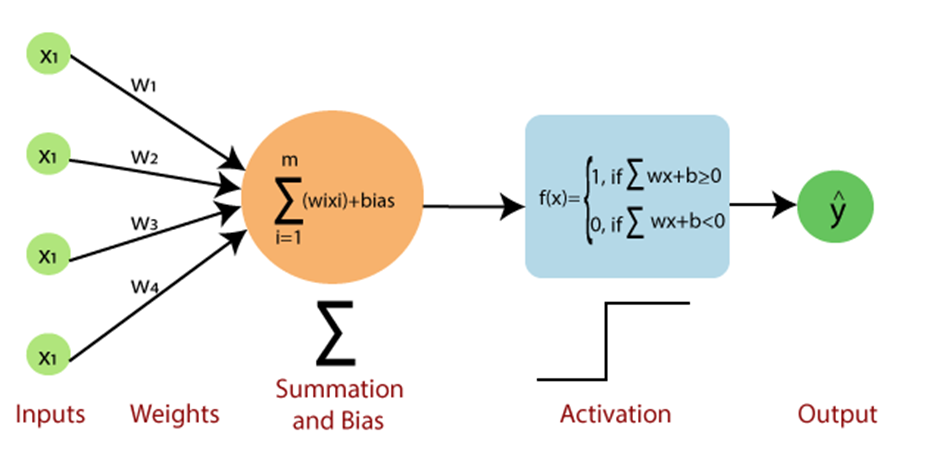

In [9]:
slp=Perceptron()
slp.fit(X_train, y_train)


Perceptron()

In [10]:
y_pred=slp.predict(X_test)

# ACCURACY SCORE

In [11]:
accuracy=accuracy_score(y_test, y_pred)
print(f"ACCURACY SCORE : {accuracy}")

ACCURACY SCORE : 0.68


# USING SCI KIT LEARN PERCEPTRON and DEFAULT VALUES WE GOT
## ACCURACY SCORE : 0.68

# Using grid search with cross-validation to find the best combination of hyperparameters (penalty, alpha, max_iter). and Accuracy

In [12]:
param_grid = {
    'penalty': ['l2', 'l1', 'elasticnet', None],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'max_iter': [10, 50, 100, 200]
}

## Explanation of `param_grid`

The provided `param_grid` is a parameter grid used for hyperparameter tuning in a machine learning model. This grid is often employed with techniques like Grid Search Cross-Validation to systematically explore different combinations of hyperparameter values and identify the set that yields the best model performance.

1. **'penalty': ['l2', 'l1', 'elasticnet', None]**
   - The `penalty` hyperparameter specifies the type of regularization applied to the model to prevent overfitting. The grid search will explore four options: 'l2' (ridge), 'l1' (lasso), 'elasticnet' (a combination of l2 and l1), and no penalty (None).

2. **'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]**
   - The `alpha` hyperparameter controls the regularization strength. Different values of alpha will be explored: 0.0001, 0.001, 0.01, 0.1, and 1.0.

3. **'max_iter': [10, 50, 100, 200]**
   - The `max_iter` hyperparameter determines the maximum number of iterations for the optimization algorithm to converge. The grid search will explore four different values: 10, 50, 100, and 200.

In summary, `param_grid` defines a search space for hyperparameters, including regularization type and strength, as well as the maximum number of iterations. Grid search will systematically test various combinations of these hyperparameter values to find the optimal set for the specific machine learning model.


In [13]:
grid_search= GridSearchCV(slp, param_grid, cv=5)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

GridSearchCV(cv=5, estimator=Perceptron(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'max_iter': [10, 50, 100, 200],
                         'penalty': ['l2', 'l1', 'elasticnet', None]})

In [14]:
best_params=grid_search.best_params_

In [15]:
best_slp=Perceptron(**best_params)

In [16]:
best_slp.fit(X_train, y_train)

Perceptron(alpha=0.001, max_iter=50, penalty='elasticnet')

In [17]:
y_pred_gs=best_slp.predict(X_test)

In [18]:
accuracy_gs=accuracy_score(y_test, y_pred_gs)

print(f"USING GRID SEARCH CV: {accuracy_gs * 100:.2f}%")

USING GRID SEARCH CV: 69.33%


# PASSING VALUES TO PERCEPTRON

In [19]:
best_perceptorn=Perceptron(penalty='l2',   # L2 Regularization (Ridge Regression)
                            alpha=0.001,
                            max_iter=100,
                            tol=1e-3,  # Adjust as needed
                           )

## Explanation of Terms in a Linear Model (Perceptron)

### 1. Penalty:
   - **Definition:** Penalty is a regularization term added to the linear model's objective function during training.
   - **Simple Explanation:** It prevents overfitting by penalizing large coefficients, discouraging the model from giving too much importance to any one feature.
   - **Parameters:**
     - `l2` (ridge): Adds the squared magnitude of coefficients to the objective function.
     - `l1` (lasso): Adds the absolute magnitude of coefficients to the objective function.
     - `elasticnet`: A combination of both `l2` and `l1` penalties.
     - `None`: No penalty.

### 2. Max_iter (Maximum Iterations):
   - **Definition:** The maximum number of iterations (passes through the dataset) during training.
   - **Simple Explanation:** It limits how many times the model updates its parameters based on the training data.
   - **Parameters:**
     - Integer value specifying the maximum number of iterations.

### 3. Alpha:
   - **Definition:** Alpha is the regularization strength, controlling the impact of the penalty term.
   - **Simple Explanation:** It determines the importance of the regularization term. Higher alpha means stronger regularization.
   - **Parameters:**
     - Small values (e.g., 0.0001, 0.001) result in weak regularization.
     - Larger values (e.g., 0.01, 0.1, 1.0) result in stronger regularization.

### 4. Tol (Tolerance):
   - **Definition:** Tolerance is the stopping criterion for the optimization algorithm.
   - **Simple Explanation:** It defines how close the algorithm should get to the optimal solution before stopping.
   - **Parameters:**
     - Small values (e.g., 1e-4, 1e-5) indicate high precision.
     - Larger values (e.g., 0.01) allow for a larger change before considering convergence.

When training a linear model like a perceptron in a machine learning framework like scikit-learn, adjusting these parameters can help control the model's behavior and improve its performance on your specific task.


In [20]:
best_perceptorn.fit(X_train, y_train)

Perceptron(alpha=0.001, max_iter=100, penalty='l2')

# Best Perceptron
* from the GridSearchCV above best perceptron parameters selected

In [21]:
y_pred_best_perceptron=best_perceptorn.predict(X_test)

In [22]:
best_perceptron_Accuracy=accuracy_score(y_test, y_pred_best_perceptron)
print(f"USING GRID SEARCH CV: {best_perceptron_Accuracy * 100:.2f}%")

USING GRID SEARCH CV: 73.33%


# USING GRID SEARCH CV WE GOT 73.33 % ACCURACY

# EARLY STOPPING

* - **EarlyStopping**
This conditional statement checks whether the actual number of iterations (actual_iterations) during the training process is less than the maximum number of iterations specified for early stopping in the Perceptron model (perceptron_early_stopping.max_iter). If the condition is true, it means that early stopping occurred (the training process stopped before reaching the maximum number of iterations), and a message is printed indicating the number of iterations at which early stopping occurred. If the condition is false, it means that the training completed without early stopping, and a corresponding message is printed.

In [23]:
# Create a perceptron with early stopping
perceptron_early_stopping = Perceptron(
    penalty='l2',
    alpha=0.001,
    max_iter=500,  # You may need to set a larger value for max_iter with early_stopping=True
    tol=1e-3,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1, #is set to 0.1, suggesting that 10% of the training data will be used as a validation set during the training process.
)

In [24]:
# Train the perceptron
perceptron_early_stopping.fit(X_train, y_train)

# Make predictions on the test set
predictions_early_stopping = perceptron_early_stopping.predict(X_test)
actual_iterations = perceptron_early_stopping.n_iter_

# Print information about early stopping
if actual_iterations < perceptron_early_stopping.max_iter:
    print(f"Early stopping occurred after {actual_iterations} iterations.")
else:
    print("Training completed without early stopping.")


# Evaluate accuracy
accuracy_early_stopping = accuracy_score(y_test, predictions_early_stopping)
print(f"Accuracy with Early Stopping: {accuracy_early_stopping * 100:.2f}%")

Early stopping occurred after 10 iterations.
Accuracy with Early Stopping: 74.67%


# MULTI- LAYER PERCEPTRON USING TENSORFLOW AND KERAS

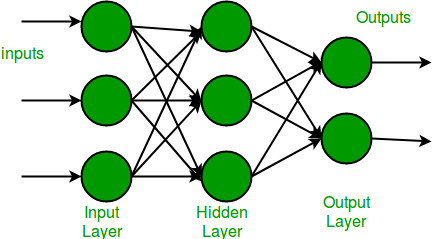

# IMPORT LIBRARIES

In [25]:
import tensorflow as tf  # tensorflow
from tensorflow.keras.models import Sequential #It is a linear stack of layers that allows for easy construction of neural network models layer by layer.
from tensorflow.keras.layers import Dense, Dropout #It is used for learning patterns in data through the weights associated with each connection.
from tensorflow.keras.optimizers import Adam    # its optimizer used in algorithm
from tensorflow.keras.callbacks import EarlyStopping #when monitored metrics stopped improving



In [26]:
# build MLP model
model=Sequential()

In [27]:
print(X_train.shape)

(224, 12)


In [28]:
# add input layer
model.add(Dense(units=12, input_dim=X_train.shape[1], activation='relu'))



* This is input layer where all our independant features will use hence we have given inputs as 12 units
* activation function we use here is relu

In [29]:
# add hidden layer
model.add(Dense(units=6, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer with a dropout rate of 0.5


* this is first hidden layer where we have given 6 units and activation function is relu
* **Dropout(0.5)** is a regularization technique in neural networks. It randomly sets 50% of the input units to zero during training, preventing overfitting by introducing redundancy. This helps improve the generalization of the model by avoiding reliance on specific neurons

In [30]:
# add hidden layer
model.add(Dense(units=3, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer with a dropout rate of 0.5

* this is second hidden layer with 3 units as 3 neurons with relu activation function

In [31]:
# output layer
# here we have classification problem so we will use segmoid
model.add(Dense(units=1, activation='sigmoid'))



- **Output Layer:**
  - **Type:** Dense layer with 1 unit.
  - **Activation Function:** Sigmoid.
  - **Purpose:** This is the final layer in the neural network, often used for binary classification tasks.
  - **Units:** 1 unit indicates a single output neuron, producing a probability value between 0 and 1.
  - **Activation ('sigmoid'):** Sigmoid activation squashes the output to the range [0, 1], suitable for binary classification where the output represents the probability of the positive class.



In [32]:
# model compile
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

- **Model Compilation:**
  - **Optimizer:** Adam optimizer with a learning rate of 0.001 is used for updating the model weights during training.
  - **Loss Function:** Binary crossentropy is the chosen loss function, suitable for binary classification tasks where the goal is to minimize the difference between predicted and true values.
  - **Metrics:** Model performance during training and evaluation is measured using accuracy, providing the proportion of correctly classified samples.


In [33]:
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


- **Early Stopping Definition:**
  - **Monitor:** Monitors the validation loss during training.
  - **Patience:** Waits for 10 epochs before considering early stopping. If the validation loss does not improve for 10 consecutive epochs, training may be stopped.
  - **Restore Best Weights:** Restores the model weights from the epoch with the lowest validation loss, preventing overfitting and ensuring the best-performing model is retained.


In [34]:
# train the model
history =model.fit(X_train, y_train, epochs=200, batch_size= 6 ,validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=2)

Epoch 1/200
38/38 - 3s - loss: 0.9452 - accuracy: 0.5312 - val_loss: 0.7542 - val_accuracy: 0.4933 - 3s/epoch - 66ms/step
Epoch 2/200
38/38 - 0s - loss: 0.8759 - accuracy: 0.5938 - val_loss: 0.7225 - val_accuracy: 0.4800 - 256ms/epoch - 7ms/step
Epoch 3/200
38/38 - 0s - loss: 0.7662 - accuracy: 0.5670 - val_loss: 0.7000 - val_accuracy: 0.5333 - 164ms/epoch - 4ms/step
Epoch 4/200
38/38 - 0s - loss: 0.7616 - accuracy: 0.6161 - val_loss: 0.6864 - val_accuracy: 0.5867 - 191ms/epoch - 5ms/step
Epoch 5/200
38/38 - 0s - loss: 0.6958 - accuracy: 0.6384 - val_loss: 0.6790 - val_accuracy: 0.6400 - 194ms/epoch - 5ms/step
Epoch 6/200
38/38 - 0s - loss: 0.6796 - accuracy: 0.6741 - val_loss: 0.6719 - val_accuracy: 0.6667 - 153ms/epoch - 4ms/step
Epoch 7/200
38/38 - 0s - loss: 0.6785 - accuracy: 0.6830 - val_loss: 0.6682 - val_accuracy: 0.6267 - 174ms/epoch - 5ms/step
Epoch 8/200
38/38 - 0s - loss: 0.6822 - accuracy: 0.6696 - val_loss: 0.6637 - val_accuracy: 0.6000 - 225ms/epoch - 6ms/step
Epoch 9/20

- **Training the Model:**
  - **Training Data:** `X_train` and `y_train` are used as the training input features and labels, respectively.
  - **Epochs:** The model is trained for 200 epochs, representing the number of times the entire training dataset is passed forward and backward through the neural network.
  - **Batch Size:** Training is performed in batches of size 6, enhancing computational efficiency.
  - **Validation Data:** `X_test` and `y_test` are used as the validation set to monitor the model's performance on unseen data during training.
  - **Callbacks:** The early stopping callback is included, which monitors the validation loss and stops training if it does not improve for 10 consecutive epochs.
  - **Verbose:** Verbosity level 2 is set, providing more detailed output during training.
  - **History:** The training history is stored in the `history` variable, containing information about training and validation metrics over epochs.


In [35]:
# Print early stopping parameters
print("Early Stopping Parameters:")
print(f"  - Monitor: {early_stopping.monitor}")
print(f"  - Patience: {early_stopping.patience}")
print(f"  - Restore Best Weights: {early_stopping.restore_best_weights}")
print(f"  - EPOCHS :",len(history.history['val_loss']))

Early Stopping Parameters:
  - Monitor: val_loss
  - Patience: 10
  - Restore Best Weights: True
  - EPOCHS : 69


- **Print Early Stopping Parameters:**
  - **Monitor:** Displays the metric monitored during early stopping (`val_loss` in this case).
  - **Patience:** Prints the number of epochs patience is set to (10 epochs in this example).
  - **Restore Best Weights:** Indicates whether the best weights are restored (`True` in this case).
  - **Number of Trained Epochs:** Prints the total number of epochs trained based on the length of the validation loss history.


In [36]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

3/3 [==============================] - 0s 4ms/step - loss: 0.5872 - accuracy: 0.6933
Test Accuracy: 69.33%


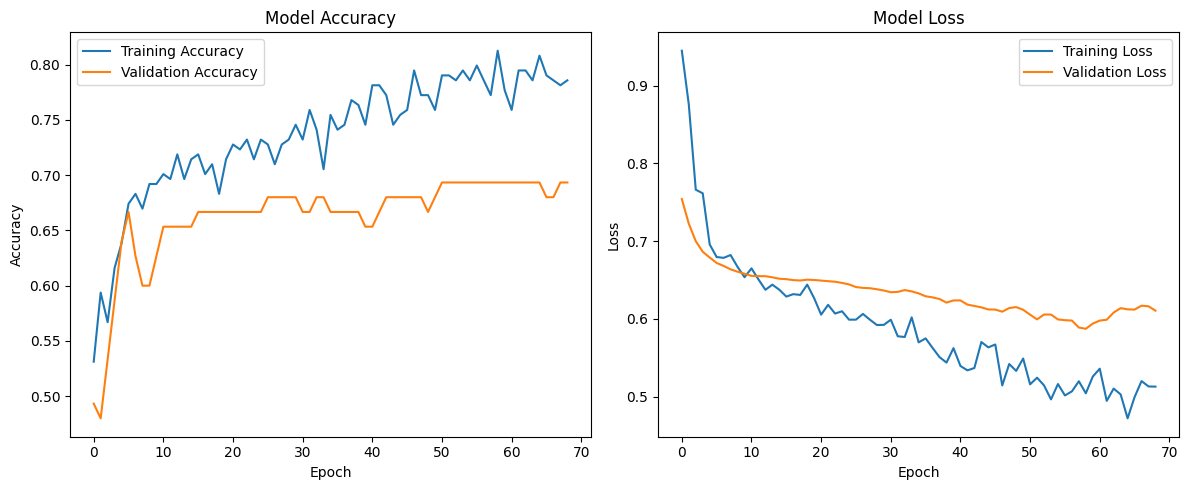

In [37]:
# Plot training history
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()